In [583]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [584]:
def load_image(path):
    byte_img=tf.io.read_file(path)
    img=tf.image.decode_jpeg(byte_img,channels=3)
    return img

In [585]:
test_images = tf.data.Dataset.list_files('data-2/*.jpeg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x/255)

In [586]:
img=test_images.shuffle(2)
img=img.batch(8)
img=img.prefetch(4)

In [587]:
from tensorflow.keras.models import load_model
model = load_model('ball-detection.h5')

In [588]:
pred=model.predict(img)

4/4 [==============================] - 4s 817ms/step


In [589]:
img.as_numpy_iterator().next()[0]

array([[[0.15882353, 0.23333333, 0.20980392],
        [0.15686275, 0.23137255, 0.20784314],
        [0.15294118, 0.22745098, 0.21176471],
        ...,
        [0.22745098, 0.3254902 , 0.30980393],
        [0.22745098, 0.3254902 , 0.30980393],
        [0.22745098, 0.3254902 , 0.30980393]],

       [[0.16078432, 0.23529412, 0.21176471],
        [0.15980393, 0.23431373, 0.21078432],
        [0.15588236, 0.23039216, 0.21470588],
        ...,
        [0.22745098, 0.3254902 , 0.30980393],
        [0.22745098, 0.3254902 , 0.30980393],
        [0.22745098, 0.3254902 , 0.30980393]],

       [[0.16470589, 0.23921569, 0.21568628],
        [0.16176471, 0.23627451, 0.2127451 ],
        [0.15980393, 0.23431373, 0.21862745],
        ...,
        [0.22745098, 0.3254902 , 0.30980393],
        [0.22745098, 0.3254902 , 0.30980393],
        [0.22745098, 0.3254902 , 0.30980393]],

       ...,

       [[0.6284314 , 0.67745095, 0.39509803],
        [0.6343137 , 0.68333334, 0.40098038],
        [0.63529414, 0

1/1 [==============================] - 1s 918ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


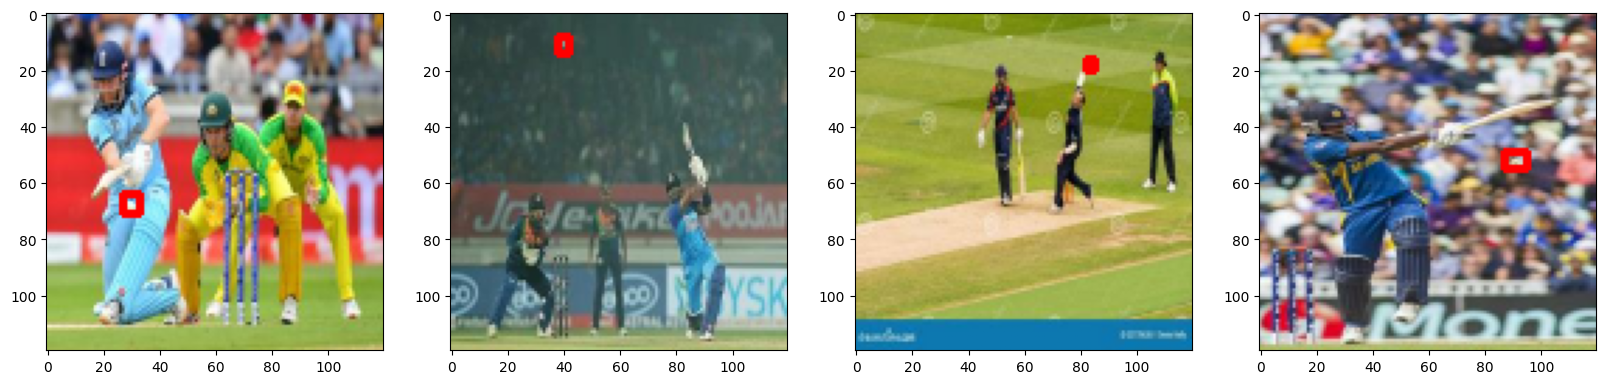

In [590]:
test_data = img.as_numpy_iterator()
test_sample = test_data.next()
yhat = model.predict(test_sample)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
yhat
for idx in range(4): 
    sample_image = test_sample[idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)